In [11]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load
final_data = "Resources/final_data.csv"

# Read the weahter and state Data
final_data_df = pd.read_csv(final_data, low_memory=False)
final_data_df  = final_data_df .rename(columns={"Sick_death_rate(in 1000 people_wkly)": "Sick death rate"})
final_data_df.head(700)



,Unnamed: 0,US State Name,State_x,State_x.1,Month_x,Avg_temp,Density (Pop./ mi2),Population,sick death,all death,Children 0-18,Adults 19-25,Adults 26-34,Adults 35-54,Adults 55-64,65+,Sick death rate,All_death_rate(in 1000 people_wkly),sick of all death,GDP per capita
0,0,Alabama,AL,Alabama,January,45.525000,95.0,4858979,93.255814,1081.883721,0.24,0.09,0.11,0.26,0.14,0.17,0.019192,0.222657,0.086198,"36,404"
1,1,Alaska,AK,Alaska,January,11.930000,1.0,738432,4.813953,82.255814,0.27,0.09,0.14,0.26,0.13,0.11,0.006519,0.111393,0.058524,"69,326"
2,2,Arizona,AZ,Arizona,January,45.960000,60.0,6828065,90.232558,1099.395349,0.25,0.09,0.12,0.25,0.12,0.17,0.013215,0.161011,0.082075,"38,340"
3,3,Arkansas,AR,Arkansas,January,40.433333,57.0,2978204,67.418605,660.209302,0.25,0.09,0.11,0.25,0.13,0.17,0.022637,0.221680,0.102117,"35,412"
4,4,California,CA,California,January,49.237500,251.0,39144818,612.139535,5480.674419,0.24,0.10,0.14,0.27,0.12,0.14,0.015638,0.140010,0.111691,"54,232"
5,5,Colorado,CO,Colorado,January,27.080000,52.0,5456574,60.325581,731.604651,0.24,0.09,0.14,0.27,0.13,0.14,0.011056,0.134078,0.082457,"50,728"
6,6,Connecticut,CT,Connecticut,January,28.600000,741.0,3590886,61.162791,645.767442,0.22,0.09,0.11,0.27,0.15,0.17,0.017033,0.179835,0.094713,"63,833"
7,7,Delaware,DE,Delaware,January,32.400000,485.0,945934,14.837209,179.953488,0.22,0.08,0.12,0.25,0.14,0.18,0.015685,0.190239,0.082450,"63,101"
8,8,Florida,FL,Florida,January,59.276923,378.0,20271272,259.860465,3878.139535,0.21,0.08,0.11,0.25,0.14,0.20,0.012819,0.191312,0.067006,"38,492"
9,9,Georgia,GA,Georgia,January,46.100000,177.0,10214860,124.883721,1637.790698,0.26,0.09,0.12,0.27,0.12,0.14,0.012226,0.160334,0.076251,"42,858"


In [12]:
Month_data = final_data_df.groupby("Month_x")
month_death = Month_data["sick death"].sum()
month_death

Month_x
April        3667.769231
August       2808.302778
December     3945.411765
February     4555.918919
January      5069.348837
July         2860.975000
June         3031.815789
March        4171.179487
May          3211.825000
November     3374.517417
October      3181.399119
September    2949.288645
Name: sick death, dtype: float64

In [13]:
month_death.to_csv("Resources/month_death_Data.csv", index=True, header=True)

In [14]:
month_death_data = "Resources/month_death_Data.csv"
month_data = "Resources/month_data.csv"

month_data_df = pd.read_csv(month_data, low_memory=False)
month_death_data_df = pd.read_csv(month_death_data, low_memory=False)
month_death_data_df = pd.merge(month_death_data_df, month_data_df, on="Month_x", how="right")
month_death_data_df= month_death_data_df.sort_values(by=['Mo_num'])
month_death_data_df.head()

month_death_data_df = month_death_data_df.rename(columns={"Month_x": "Month"
                                         })
# Filter the DataFrame down only to those columns to chart
month_death_data_df = month_death_data_df[["Month","sick death"]]

# Set the index to be "State" so they will be used as labels
month_death_data_df = month_death_data_df.set_index("Month")

month_death_data_df.head()

,sick death
Month,
January,5069.348837
February,4555.918919
March,4171.179487
April,3667.769231
May,3211.825000


In [15]:
month_death_data_df.reset_index(level=0, inplace=True)
month_death_data_df

,Month,sick death
0,January,5069.348837
1,February,4555.918919
2,March,4171.179487
3,April,3667.769231
4,May,3211.825000
5,June,3031.815789
6,July,2860.975000
7,August,2808.302778
8,September,2949.288645
9,October,3181.399119


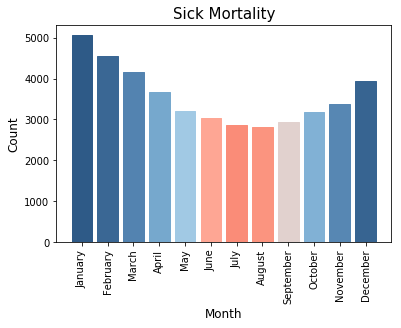

<Figure size 432x288 with 0 Axes>

In [16]:
import matplotlib.pyplot as plt

barlist=plt.bar(month_death_data_df["Month"], month_death_data_df["sick death"])
barlist[0].set_color([46/255,90/255,135/255])
barlist[1].set_color([58/255,103/255,148/255])
barlist[2].set_color([83/255,131/255,176/255])
barlist[3].set_color([118/255,168/255,205/255])
barlist[4].set_color([161/255,201/255,228/255])
barlist[5].set_color([254/255,166/255,148/255])
barlist[6].set_color([250/255,140/255,120/255])
barlist[7].set_color([251/255,148/255,127/255])
barlist[8].set_color([225/255,209/255,206/255])
barlist[9].set_color([129/255,177/255,213/255])
barlist[10].set_color([87/255,135/255,179/255])
barlist[11].set_color([55/255,100/255,145/255])

plt.xlabel("Month", fontsize=12)
plt.title("Sick Mortality", fontsize=15)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=90)

plt.show()
plt.savefig('sick_mortality.png')

In [17]:
Month_data_all_death = final_data_df.groupby("Month_x")
Month_data_all_death = Month_data_all_death["all death"].sum()
Month_data_all_death 

Month_x
April        49654.128205
August       46388.236111
December     51836.941176
February     53236.189189
January      54987.069767
July         46641.175000
June         47054.473684
March        51558.564103
May          47682.900000
November     48755.306879
October      48052.126287
September    46926.413187
Name: all death, dtype: float64

In [18]:
Month_data_all_death.to_csv("Resources/Month_data_all_death.csv", index=True, header=True)

In [19]:
Month_data_all_death = "Resources/Month_data_all_death.csv"
month_data = "Resources/month_data.csv"

month_data_df = pd.read_csv(month_data, low_memory=False)
Month_data_all_death_df = pd.read_csv(Month_data_all_death, low_memory=False)
Month_data_all_death_df = pd.merge(Month_data_all_death_df, month_data_df, on="Month_x", how="right")
Month_data_all_death_df= Month_data_all_death_df.sort_values(by=['Mo_num'])
Month_data_all_death_df.head()

##Month_data_all_death_df = Month_data_all_death_df.rename(columns={"Month_x": "Month"
     ##                                    })
# Filter the DataFrame down only to those columns to chart
Month_data_all_death_df = Month_data_all_death_df[["Month_x","all death"]]

# Set the index to be "State" so they will be used as labels
##Month_data_all_death_df = Month_data_all_death_df.set_index("Month_x")

Month_data_all_death_df.head(12)

,Month_x,all death
4,January,54987.069767
3,February,53236.189189
7,March,51558.564103
0,April,49654.128205
8,May,47682.900000
6,June,47054.473684
5,July,46641.175000
1,August,46388.236111
11,September,46926.413187
10,October,48052.126287


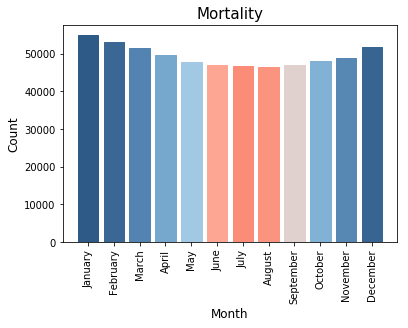

<Figure size 432x288 with 0 Axes>

In [20]:
import matplotlib.pyplot as plt

barlist=plt.bar(Month_data_all_death_df["Month_x"], Month_data_all_death_df["all death"])
barlist[0].set_color([46/255,90/255,135/255])
barlist[1].set_color([58/255,103/255,148/255])
barlist[2].set_color([83/255,131/255,176/255])
barlist[3].set_color([118/255,168/255,205/255])
barlist[4].set_color([161/255,201/255,228/255])
barlist[5].set_color([254/255,166/255,148/255])
barlist[6].set_color([250/255,140/255,120/255])
barlist[7].set_color([251/255,148/255,127/255])
barlist[8].set_color([225/255,209/255,206/255])
barlist[9].set_color([129/255,177/255,213/255])
barlist[10].set_color([87/255,135/255,179/255])
barlist[11].set_color([55/255,100/255,145/255])

plt.xlabel("Month", fontsize=12)
plt.title("Mortality", fontsize=15)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=90)

plt.show()
plt.savefig('mortality.png')